In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/master/iris-data.csv')

In [0]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [0]:
#Plot
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [0]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [0]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [0]:
final_df = df[df['class'] != 'Iris-virginica']

In [0]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Outlier Check

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


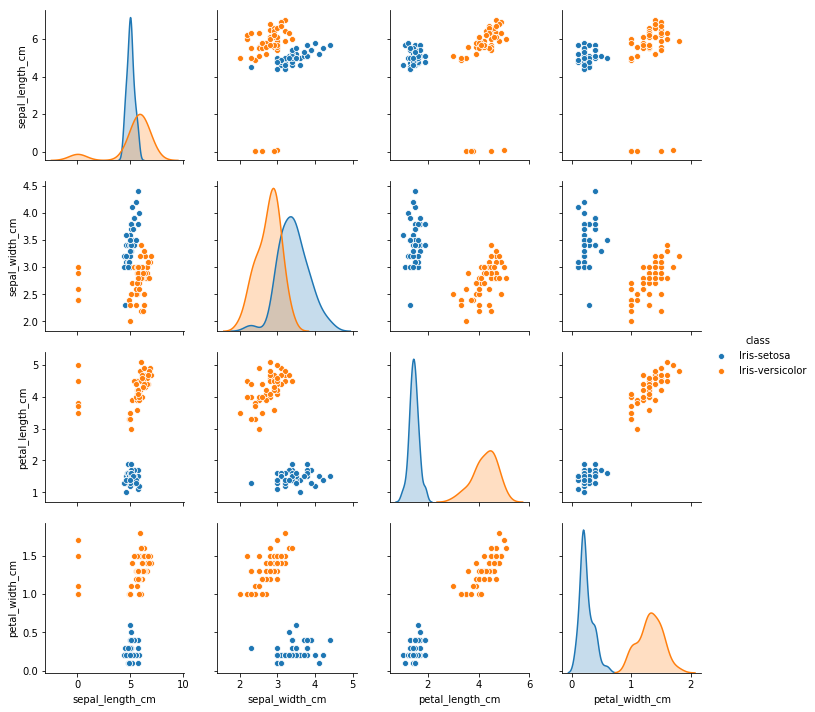

In [0]:
sns.pairplot(final_df, hue='class', size=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

SEPAL LENGTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fe0b6780>]],
      dtype=object)

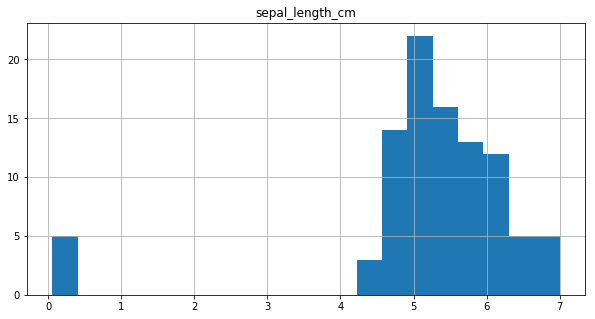

In [0]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fe110ac8>]],
      dtype=object)

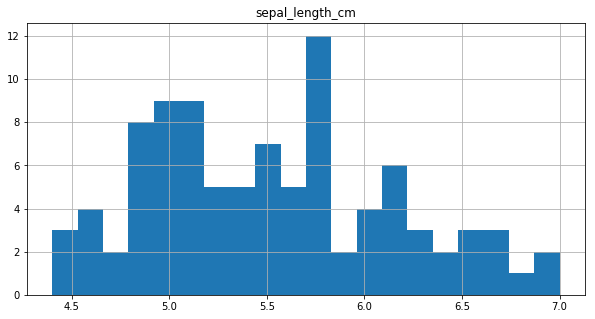

In [0]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

SEPAL WIDTH

In [0]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


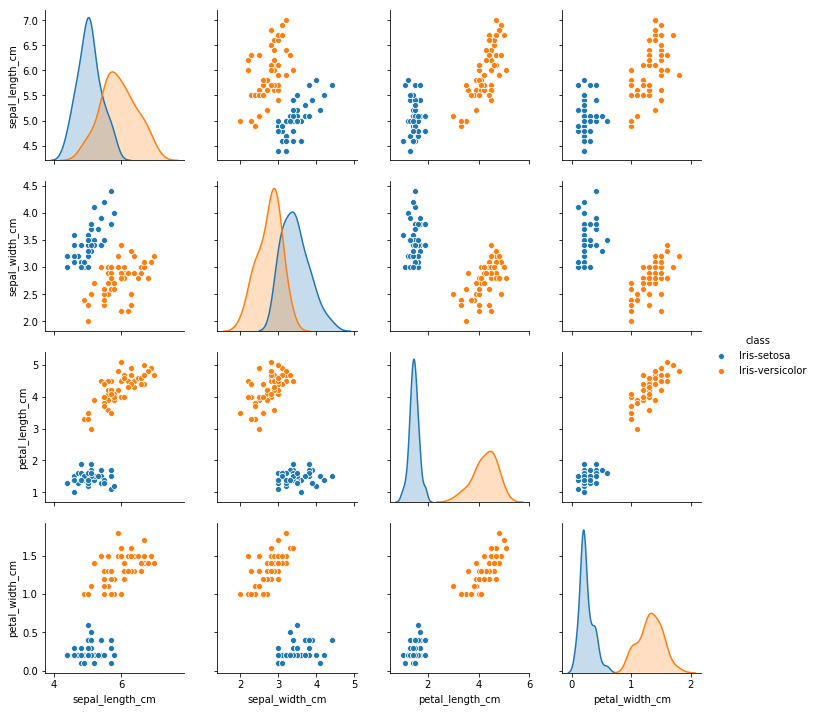

In [0]:
sns.pairplot(final_df, hue='class', size=2.5)

Successfully removed outliers!!

# Label Encoding

In [0]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [0]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [0]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [0]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


In [0]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [0]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [0]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    #print(final_result)#[[0.5,0.5,0.5,......,0.5]]
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [0]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #print(grads, cost)
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [0]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [0]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#print(w, b)
#Gradient Descent
print(X_tr_arr.shape,y_tr_arr.shape)
#print(np.dot(w,X_tr_arr.T)+b)
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
(75, 4) (75, 1)
Optimized weights [[-0.13397714  0.13130132 -0.18248682 -0.18319564]]
Optimized intercept -0.02413463192134359
Training Accuracy 1.0
Test Accuracy 1.0


[0.6931471805599454, 0.6862128163275052, 0.6793812353404843, 0.6726508855874613, 0.6660202265593521, 0.6594877299077944, 0.6530518800602878, 0.6467111747931193, 0.6404641257631651, 0.6343092589996987, 0.6282451153573843, 0.6222702509316617, 0.6163832374377575, 0.6105826625545754, 0.6048671302347364, 0.599235260982043, 0.5936856920976487, 0.5882170778962106, 0.5828280898933004, 0.5775174169653342, 0.5722837654832733, 0.5671258594213301, 0.5620424404418909, 0.5570322679578523, 0.552094119173537, 0.5472267891053304, 0.5424290905831572, 0.5376998542338777, 0.5330379284476623, 0.5284421793283675, 0.5239114906289027, 0.5194447636725488, 0.5150409172611526, 0.5106988875710895, 0.5064176280378531, 0.5021961092300983, 0.49803331871392814, 0.49392826090818265, 0.48987995693146213, 0.4858874444415718, 0.48194977746805584, 0.47806602623845146, 0.4742352769988663, 0.4704566318294485, 0.4667292084552954]


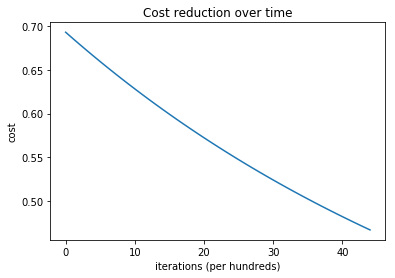

In [0]:
print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression()

In [0]:
clf.fit(X_tr_arr, y_tr_arr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print (clf.intercept_, clf.coef_)

[-0.32958987] [[-0.65118738  1.21001434 -1.38924001 -1.46364162]]


In [0]:
pred = clf.predict(X_ts_arr)

In [0]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0


[[-0.65118738  1.21001434 -1.38924001 -1.46364162]] [-0.32958987]
[[-0.13397714  0.13130132 -0.18248682 -0.18319564]] -0.02413463192134359
[[0.37330692 0.61067147 0.35589002 0.39175516 0.63288113 0.64710729
  0.63965063 0.30498302 0.34205193 0.62406461 0.32437493 0.64405974
  0.30929031 0.62789597 0.64110003 0.37128793 0.6360005  0.35414373
  0.63189377 0.63177593 0.32766335 0.67812892 0.6352006  0.39281135
  0.62469537 0.40827907 0.61379767 0.6361842  0.63771222 0.68291011
  0.63066808 0.59463421 0.41932094 0.65214583 0.40882794 0.65964584
  0.44228858 0.36250741 0.39074138 0.4157475  0.63342943 0.35215935
  0.41023522 0.31273658 0.34779596 0.40239922 0.36586735 0.38660337
  0.64698081 0.41785777 0.32171472 0.32073757 0.35167563 0.63023738
  0.38629509 0.34341569 0.39772812 0.37950196 0.60975717 0.63023738
  0.61905409 0.33749141 0.6186832  0.64492976 0.62980522 0.36092862
  0.39931202 0.38323114 0.40921816 0.60792098 0.38149658 0.29947538
  0.64985654 0.45194049 0.45448516]]
[0.01913

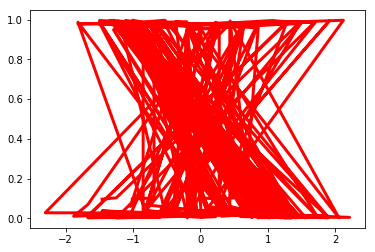

In [0]:
from scipy.special import expit
#print(X_tr_arr)
#print(clf.coef_)
#print(X_tr_arr * clf.coef_ + clf.intercept_)
loss_ = expit(X_tr_arr * clf.coef_ + clf.intercept_).ravel() # expit(x) = 1/(1+exp(-x))
loss = expit(np.dot(clf.coef_,X_tr_arr.T) + clf.intercept_).ravel() # expit(x) = 1/(1+exp(-x))
#sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
#print(loss)
#print(np.dot(w,X_tr_arr.T))
print(clf.coef_,clf.intercept_)
print(w,b)
#print(np.dot(w,X_tr_arr.T)+b)
print(sigmoid_activation(np.dot(w,X_tr_arr.T)+b))
print(loss)
#loss_2 = expit(clf.predict(X_test.reshape(-1,1)))
plt.plot(X_tr_arr, loss, color='red', linewidth=3)
#plt.plot(X_test, loss_2, color='blue', linewidth=10,alpha=.5)
#print(X_tr_arr)
plt.show()